# Wheat Future Market Analysis Report

## Market Info
#### Symbol Convention
[Base Symbol]+[Month Code]+[Year]

- For example, ```ZWN25``` is the Chicago soft red winter wheat future with expiration in July 2025.
- ```ZW=F``` refers to the **nearest to expiration** Chicago soft red winter wheat futures contract. For example, from March to April, the ```ZW=F``` tracks the May futures ```ZWK```.

#### Quick Summary

| Wheat Type                | Symbol | Key Growing Regions    | Primary Uses                       | Planting Season | Harvest Season | Vulnerable to                              | Expiry Month                           |
|---------------------------|--------|------------------------|------------------------------------|-----------------|----------------|--------------------------------------------|----------------------------------------|
| **Soft Red Winter Wheat** | `ZW`   | IL, IN, OH, MO, KY     | Pastries, cakes, cookies           | Sep-Nov         | May-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Winter Wheat** | `KE`   | Central U.S. (Plains)  | Bread, rolls, all-purpose flour    | Sep-Oct         | Jun-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Spring Wheat** | `MW`   | Northern U.S. & Canada | Premium bread, bagels, pizza dough | Apr-May         | Aug-Sep        | wet planting conditions summer heat stress | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |

#### Geopolitical & Export Demand
- Hard Red Winter & Spring Wheat are key U.S. exports (buyers include China, Mexico, and Egypt).
- Russia and Ukraine produce competing wheat types, affecting global prices.

#### Last trading day
- The business day before the 15th calendar day of the contract month. Usually, it would be the 14th of that day at 1:20pm CT.
- The wheat is already in the warehouse before the expiration date. Once the ownership is transferred to the long trader, the long trader must pay the storage fees.
- After the last trading day, the buyer of the contract must take delivery. This will incur daily warehouse fee, handling fees and delivery fees.
- Most trades will close their positions before the First Notice day, or the last trading day.

In [236]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from src.data.preprocess import extend_market_data
from pandas.tseries.offsets import BDay
from datetime import datetime, timedelta



## Market Data Analysis (SRW)

In [59]:
# Obtaining the nearest to expiration wheat future
SRW = yf.Ticker("ZW=F")
HRW = yf.Ticker("KE=F")
SRW_data = SRW.history(start ="2019-01-01").drop(['Dividends', 'Stock Splits'], axis=1)
HRW_data = HRW.history(start ="2019-01-01").drop(['Dividends', 'Stock Splits'], axis=1)

SRW_data = extend_market_data(SRW_data)
HRW_data = extend_market_data(HRW_data)

SRW_data['30D_Volatility'] = SRW_data['Log_Return'].rolling(window=30).std()
SRW_data['7D_Log_Return'] = np.log(SRW_data['Close']/SRW_data['Close'].shift(7))


In [60]:
SRW_data

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,expiry,...,TR,14D_ATR,Volume_Volatility_Ratio,14D_RSI,7D_MA,14D_MA,7D_EMA,14D_EMA,30D_Volatility,7D_Log_Return
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,502.50,510.75,501.25,506.75,46442,2019,1,2,2,2019-03-14,...,9.50,NaN,NaN,NaN,NaN,NaN,506.750000,506.750000,NaN,NaN
2019-01-03,506.75,516.00,506.00,513.75,48800,2019,1,3,3,2019-03-14,...,10.00,NaN,NaN,NaN,NaN,NaN,508.500000,507.683333,NaN,NaN
2019-01-04,513.75,518.75,513.00,517.00,44054,2019,1,4,4,2019-03-14,...,5.75,NaN,NaN,NaN,NaN,NaN,510.625000,508.925556,NaN,NaN
2019-01-07,518.00,518.50,513.50,516.75,41549,2019,1,7,7,2019-03-14,...,5.00,NaN,NaN,NaN,NaN,NaN,512.156250,509.968815,NaN,NaN
2019-01-08,516.50,524.50,513.75,517.75,71731,2019,1,8,8,2019-03-14,...,10.75,NaN,NaN,NaN,NaN,NaN,513.554688,511.006306,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-28,531.75,533.00,517.50,528.25,81818,2025,3,28,87,2025-05-14,...,15.50,11.803571,5.556963e+06,39.570552,543.214286,548.017857,539.847839,544.969133,0.017422,-0.064598
2025-03-31,529.50,539.25,523.50,537.00,83018,2025,3,31,90,2025-05-14,...,15.75,12.625000,5.380776e+06,47.674419,540.321429,547.732143,539.135879,543.906582,0.016083,-0.037016
2025-04-01,539.00,544.00,533.25,540.50,62409,2025,4,1,91,2025-05-14,...,10.75,12.892857,4.026824e+06,51.002865,537.785714,547.857143,539.476909,543.452371,0.016051,-0.032312


In [4]:
HRW_data

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,expiry,...,High-Close,Low-Close,TR,14D_ATR,Volume_Volatility_Ratio,14D_RSI,7D_MA,14D_MA,7D_EMA,14D_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,638.50,639.75,630.25,631.25,8107,2014,1,2,2,2014-03-14,...,NaN,NaN,9.50,NaN,NaN,NaN,NaN,NaN,631.250000,631.250000
2014-01-03,631.25,644.00,630.50,642.50,13022,2014,1,3,3,2014-03-14,...,12.75,0.75,13.50,NaN,NaN,NaN,NaN,NaN,634.062500,632.750000
2014-01-06,644.50,650.75,643.00,644.00,9500,2014,1,6,6,2014-03-14,...,8.25,0.50,8.25,NaN,NaN,NaN,NaN,NaN,636.546875,634.250000
2014-01-07,645.25,650.50,641.50,645.25,10599,2014,1,7,7,2014-03-14,...,6.50,2.50,9.00,NaN,NaN,NaN,NaN,NaN,638.722656,635.716667
2014-01-08,645.25,651.00,635.00,637.00,16018,2014,1,8,8,2014-03-14,...,5.75,10.25,16.00,NaN,NaN,NaN,NaN,NaN,638.291992,635.887778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,544.50,554.75,544.00,551.00,17624,2024,12,23,358,2025-03-14,...,10.00,0.75,10.75,10.303571,1.283198e+06,65.957447,548.321429,544.839286,547.516868,546.183346
2024-12-24,550.50,552.50,543.25,543.75,7852,2024,12,24,359,2025-03-14,...,1.50,7.75,9.25,10.464286,5.446733e+05,59.248555,549.035714,545.982143,546.575151,545.858900
2024-12-26,544.25,554.50,544.25,551.50,9931,2024,12,26,361,2025-03-14,...,10.75,0.50,10.75,10.428571,6.933491e+05,59.011628,547.928571,547.089286,547.806363,546.611047


### Trading Volume Analysis

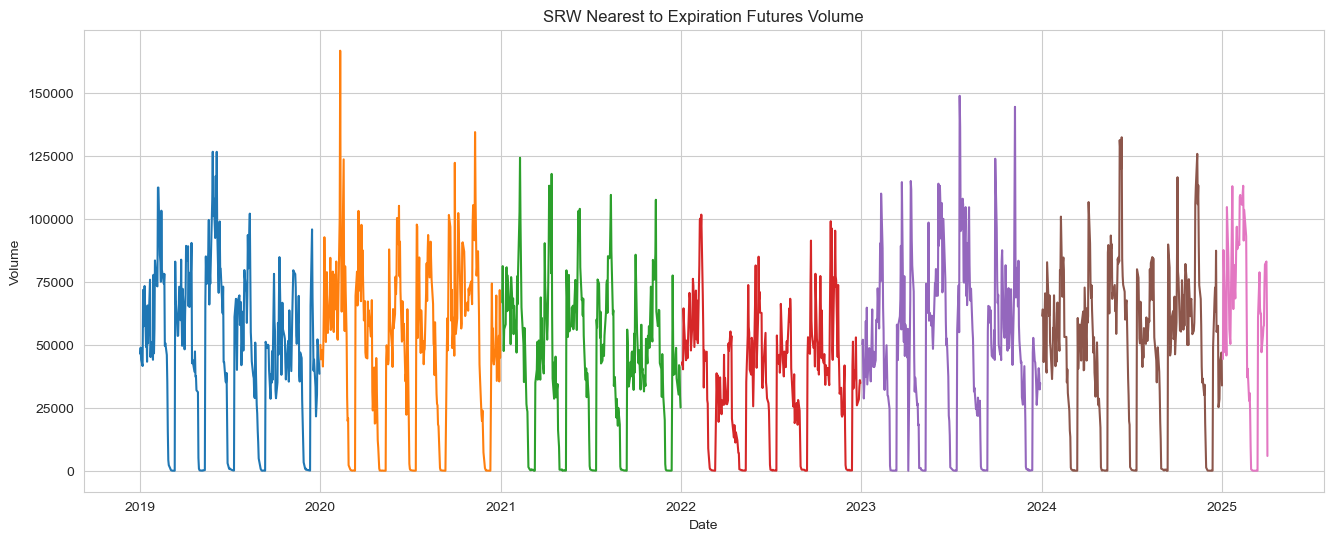

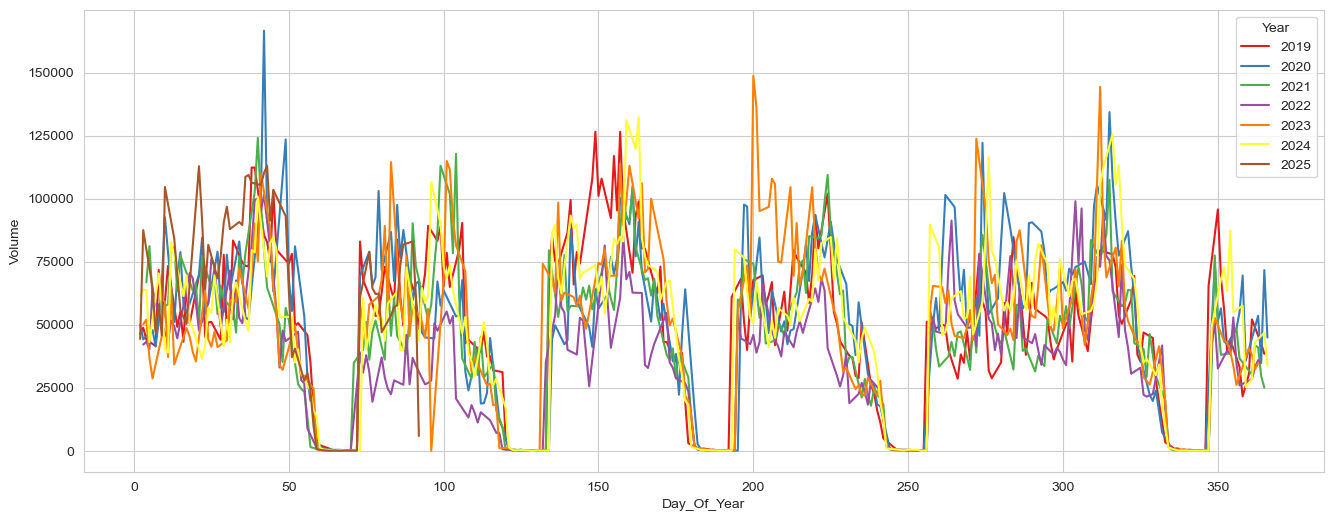

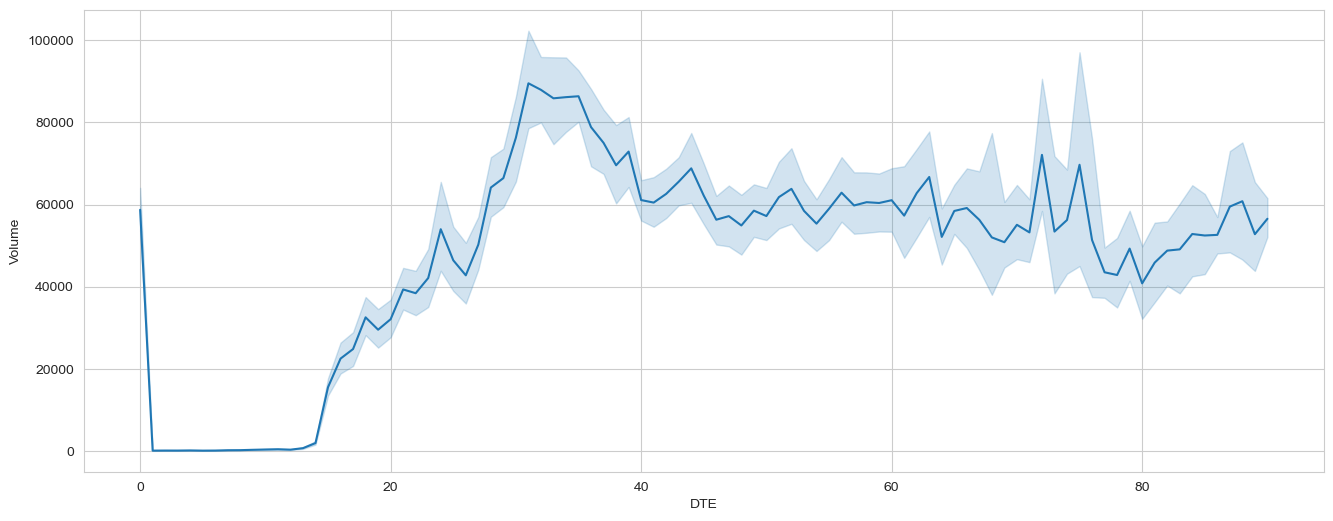

In [49]:
plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Trading Volume")
for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data)
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Volume', data = SRW_data, hue ='Year', palette='Set1')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'DTE', y = 'Volume', data = SRW_data)
plt.show()

plt.figure(figsize = (16,9))

# fig, axes = plt.subplots(2)
# for year in SRW_data['Year'].unique():  # Loop through each unique year
#     yearly_data = SRW_data[SRW_data['Year'] == year]
#     sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data, ax = axes[0])
#
# sns.lineplot(x = 'DTE', y = 'Volume', data = SRW_data, ax = axes[1])
# axes[0].set_title("Trading Volume of the SRW Nearest to Expiration Future")
# axes[0].set_xlabel('')
# axes[1].set_xlabel('Days to Expiry')
# plt.savefig('../imgs/wheat/volume.png')
# plt.show()

- As the expiry date approaches, many traders who are holding futures positions may no longer be interested in speculating on short-term price movements. The trading volume decreases when approaching the expiry date.
- At the expiry date, traders with open positions need to exit their contracts before the last trading day unless they plan for physical delivery. Many speculative traders close positions to avoid delivery obligations. This leads to a surge in trading volume.

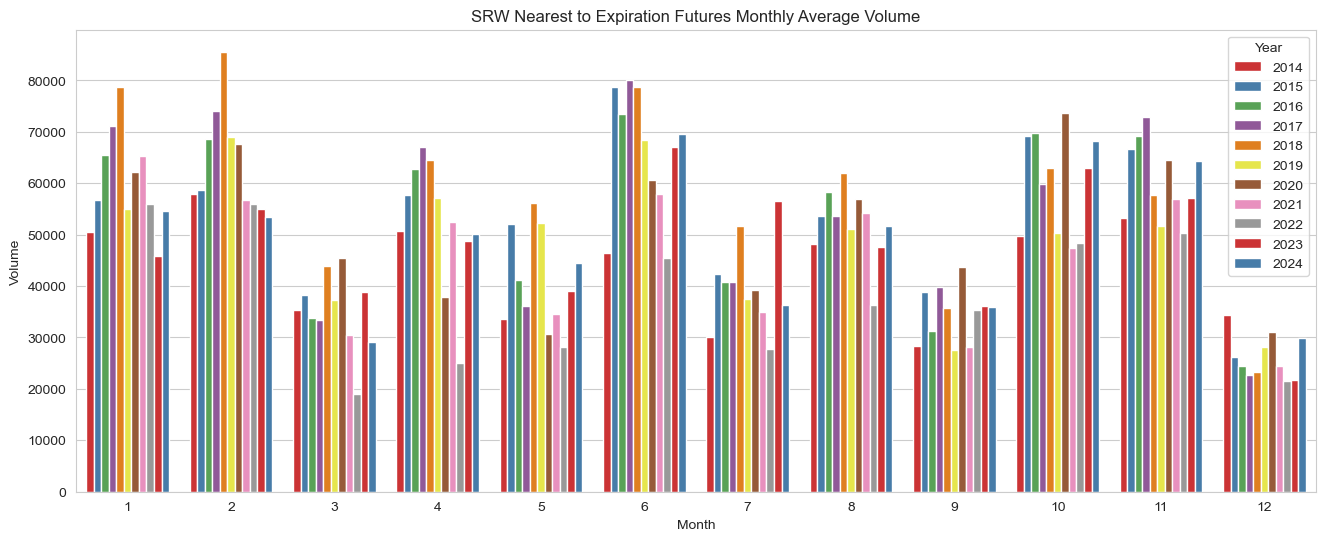

In [6]:
monthly_average = SRW_data.groupby(['Year', 'Month']).Volume.agg('mean').reset_index()

plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Monthly Average Volume")
sns.barplot(x = 'Month', y = 'Volume', data = monthly_average, hue = 'Year', palette='Set1')
# sns.barplot(x = 'Month', y = 'Volume', data = monthly_average)
plt.show()

The trading volume in Mar, May, July, Sept, Dec are low. This is partially because those month are the expiration month, and the data are coming from the nearest to expiration Futures. After the final trading day, no transactions are allowed.

### Price Analysis

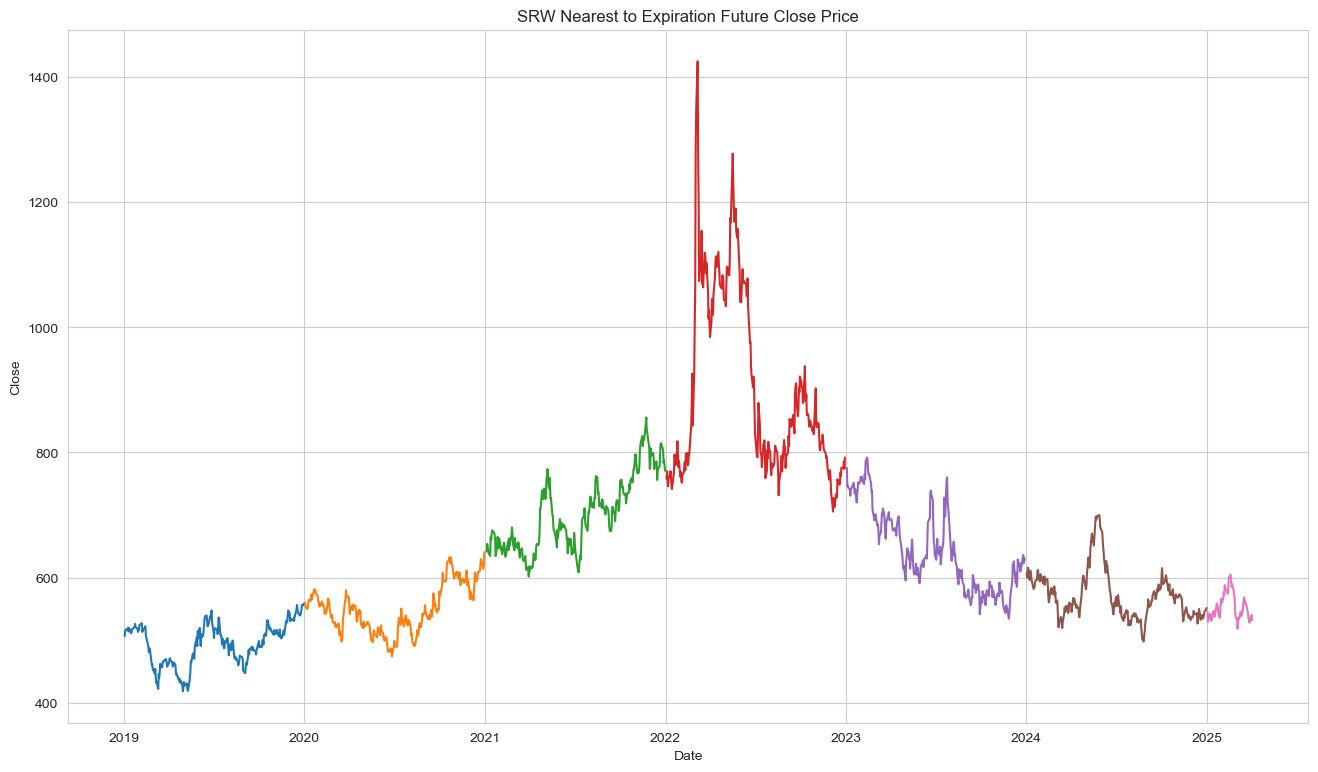

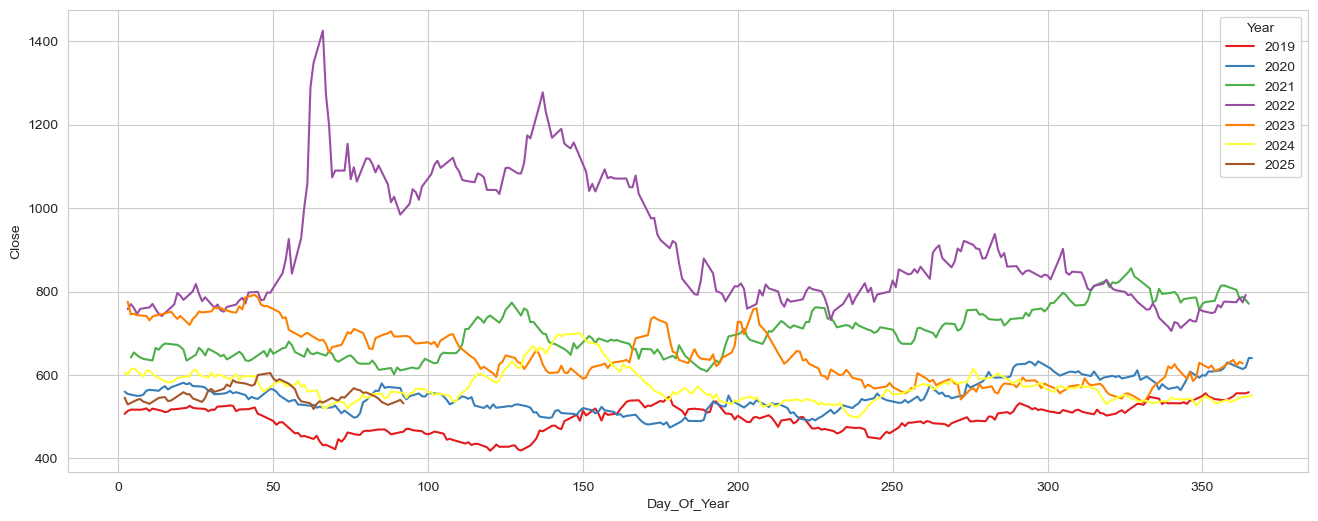

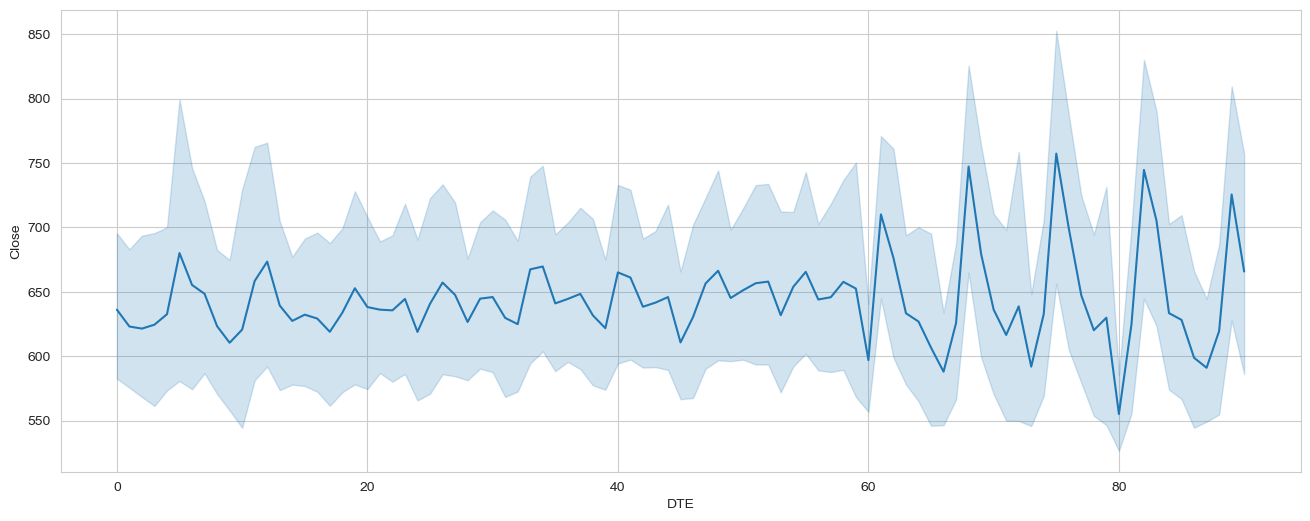

In [48]:
plt.figure(figsize = (16,9))
plt.title("SRW Nearest to Expiration Future Close Price")
for year in SRW_data['Year'].unique():  # Loop through each unique year
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Close', data = yearly_data)
# plt.savefig('../imgs/wheat/price.png')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Close', data = SRW_data, hue ='Year', palette='Set1')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'DTE', y = 'Close', data = SRW_data)
plt.show()

count    1573.000000
mean        0.000047
std         0.021158
min        -0.112971
25%        -0.012350
50%        -0.000615
75%         0.011546
max         0.197014
Name: Log_Return, dtype: float64


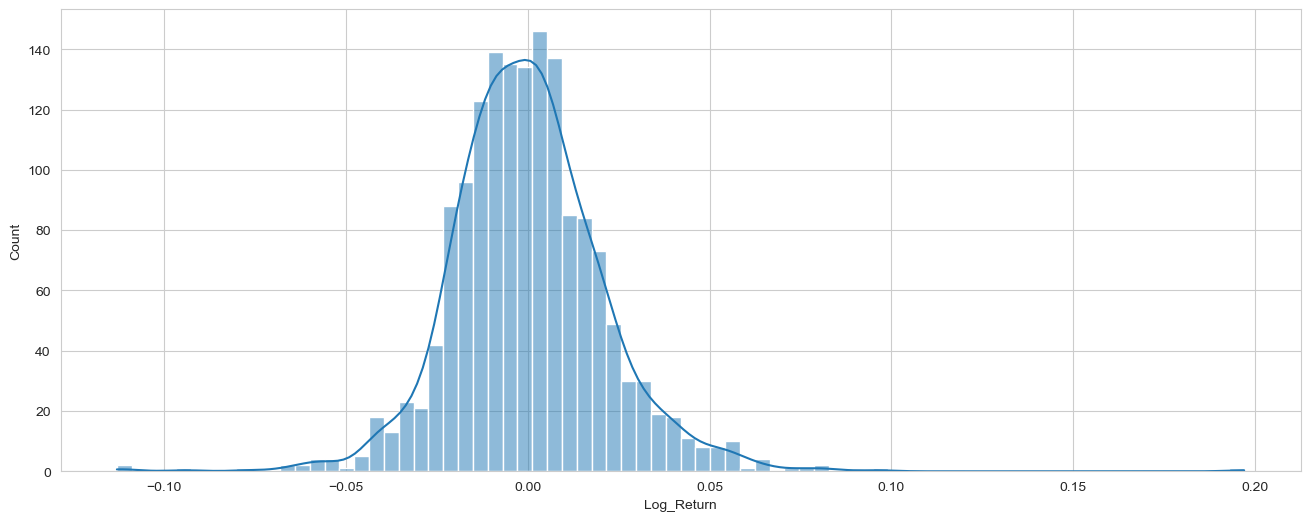

In [61]:
plt.figure(figsize = (16,6))
sns.histplot(SRW_data['Log_Return'], kde = True)
print(SRW_data['Log_Return'].describe())

There is almost no seasonality in the data. We verify this by performing the Fourier transform

/var/folders/2h/69hg_xrd4fb4nytgmwvn8ch40000gn/T/ipykernel_2128/3862331610.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / frequencies, power)


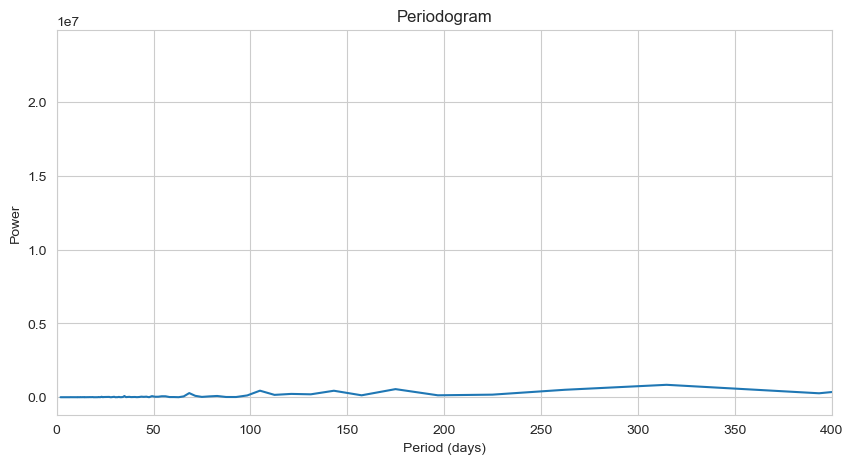

In [62]:
frequencies, power = periodogram(SRW_data['Close'].dropna())

plt.figure(figsize=(10, 5))
plt.plot(1 / frequencies, power)
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.title("Periodogram")
plt.xlim(0, 400)  # Limit x-axis to reasonable periods
plt.show()

# Autocorrelation and Partial Auto Correlation

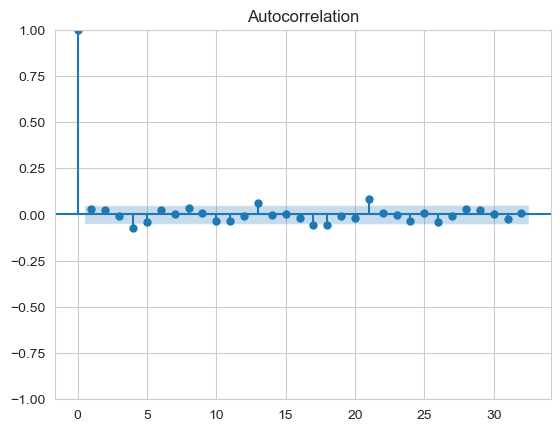

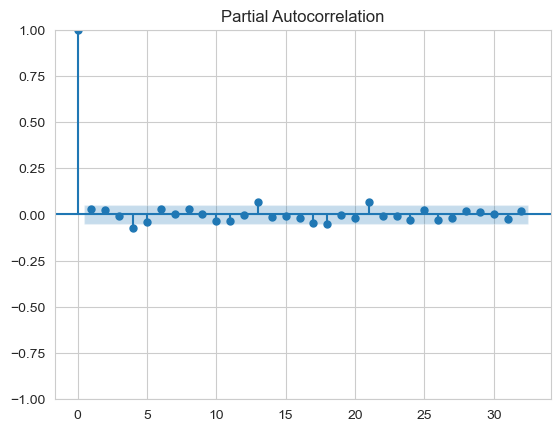

In [92]:
plot_acf(SRW_data['Log_Return'].dropna())
plot_pacf(SRW_data['Log_Return'].dropna())
plt.show()

# 7D log return pacf for other symvols

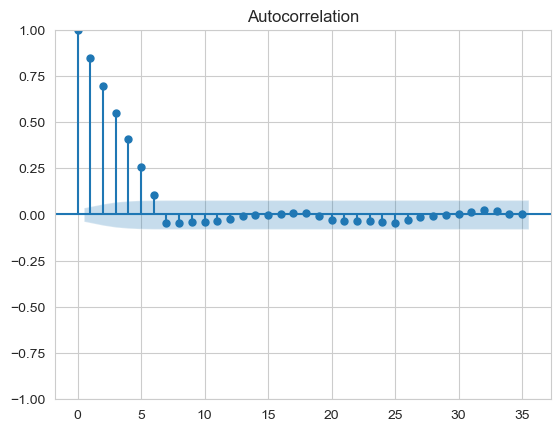

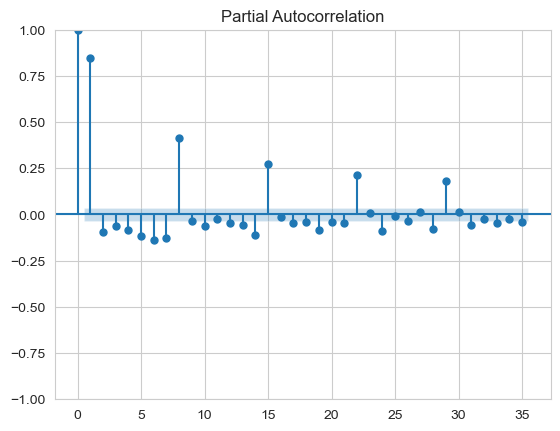

In [168]:
corn = yf.Ticker('AMZN')
corn_data = corn.history(start ="2014-01-01").drop(['Dividends', 'Stock Splits'], axis=1)
corn_data['7D_Log_Return'] = np.log(corn_data['Close']/corn_data['Close'].shift(7))
plot_acf(corn_data['7D_Log_Return'].dropna())
plot_pacf(corn_data['7D_Log_Return'].dropna())
plt.show()

In [169]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


data = corn_data.dropna()
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        # the following code assumes that the target is the last column
        targets.append(data[i+seq_length][-1])
    return np.array(sequences), np.array(targets)

data_train = data[:-500]
data_test = data[-500:]

# Now, this scaler will not cause data leakage
scaler = MinMaxScaler(feature_range=(-1, 1))
data_train= scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
data_scaled = np.vstack([data_train, data_test])

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X[:-500], dtype=torch.float32).to(device), torch.tensor(y[:-500], dtype=torch.float32).to(device)
X_test, y_test = torch.tensor(X[-500:], dtype=torch.float32).to(device), torch.tensor(y[-500:], dtype=torch.float32).to(device)

# Reshape for LSTM (batch_size, seq_length, num_features)
X_train = X_train.view(-1, SEQ_LENGTH, 6)
X_test = X_test.view(-1, SEQ_LENGTH, 6)

# Create DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)


Using mps device


In [170]:
X[1]

array([[-0.93772112, -0.93785785, -0.93712474, -0.93578673, -0.87300869,
         0.17303539],
       [-0.93378425, -0.93746734, -0.93639808, -0.9367564 , -0.84356774,
         0.18426756],
       [-0.93682507, -0.93747882, -0.93822648, -0.93679705, -0.85027944,
         0.14058402],
       [-0.93648978, -0.93506688, -0.93573585, -0.93458482, -0.68454132,
         0.14002032],
       [-0.93143717, -0.93259176, -0.93108278, -0.93026482, -0.8049341 ,
         0.22014578],
       [-0.92854666, -0.93244245, -0.93084836, -0.93172225, -0.8973484 ,
         0.22866973],
       [-0.93259337, -0.93352782, -0.93331556, -0.93443384, -0.81335202,
         0.24928678],
       [-0.93423516, -0.93695623, -0.93948059, -0.94155833, -0.68860665,
         0.06436664],
       [-0.93866344, -0.94045931, -0.94345389, -0.94232478, -0.73401292,
         0.06745463],
       [-0.94045554, -0.94009178, -0.93956849, -0.93759253, -0.82474711,
         0.14890444],
       [-0.93770378, -0.94117715, -0.94184229, -0.

In [171]:
y[0]

np.float64(0.1095185343115444)

In [172]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim=6, hidden_dim=64, num_layers=2, output_dim=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Take last output from LSTM
        return out

# Initialize Model
model = LSTMModel().to(device)

In [173]:
# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
EPOCHS = 1000
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss/len(train_loader):.6f}')

Epoch [10/1000], Loss: 0.010719
Epoch [20/1000], Loss: 0.009866
Epoch [30/1000], Loss: 0.008880
Epoch [40/1000], Loss: 0.008193
Epoch [50/1000], Loss: 0.007759
Epoch [60/1000], Loss: 0.007546
Epoch [70/1000], Loss: 0.007255
Epoch [80/1000], Loss: 0.006681
Epoch [90/1000], Loss: 0.005990
Epoch [100/1000], Loss: 0.005528
Epoch [110/1000], Loss: 0.005055
Epoch [120/1000], Loss: 0.004691
Epoch [130/1000], Loss: 0.004242
Epoch [140/1000], Loss: 0.003763
Epoch [150/1000], Loss: 0.003326
Epoch [160/1000], Loss: 0.002893
Epoch [170/1000], Loss: 0.002646
Epoch [180/1000], Loss: 0.002163
Epoch [190/1000], Loss: 0.001912
Epoch [200/1000], Loss: 0.001838
Epoch [210/1000], Loss: 0.001463
Epoch [220/1000], Loss: 0.001305
Epoch [230/1000], Loss: 0.000970
Epoch [240/1000], Loss: 0.000916
Epoch [250/1000], Loss: 0.000871
Epoch [260/1000], Loss: 0.000660
Epoch [270/1000], Loss: 0.000609
Epoch [280/1000], Loss: 0.000630
Epoch [290/1000], Loss: 0.000464
Epoch [300/1000], Loss: 0.000404
Epoch [310/1000], L

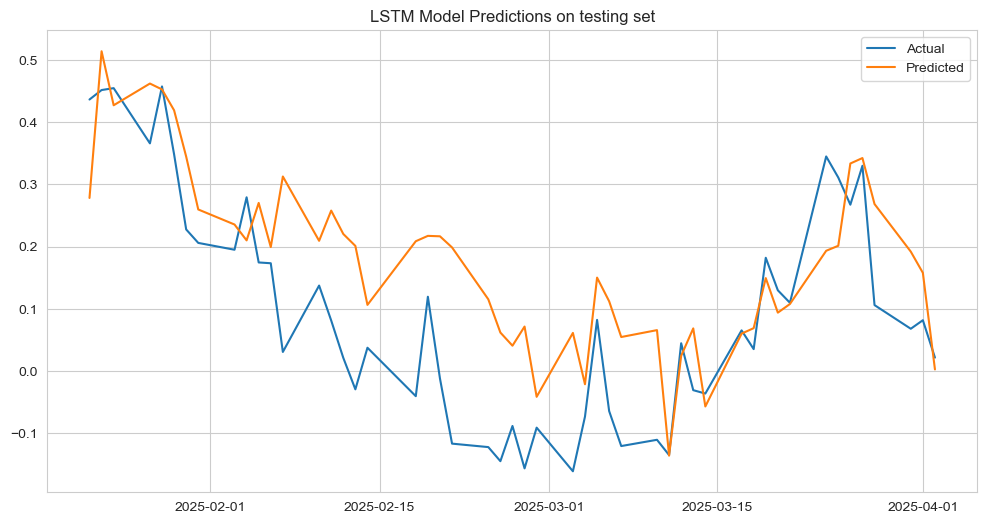

r2 score 0.6618


In [175]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze().cpu().numpy()

# Inverse transform predictions
# y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
# y_test_rescaled = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

y_pred_test_rescaled = y_pred_test.reshape(-1, 1)
y_test_rescaled = y_test.cpu().numpy().reshape(-1, 1)

# Plot results

plt.figure(figsize=(12, 6))
plt.plot(data.index[-50:], y_test_rescaled[-50:], label='Actual')
plt.plot(data.index[-50:], y_pred_test_rescaled[-50:], label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test_rescaled, y_pred_test_rescaled):.4f}")

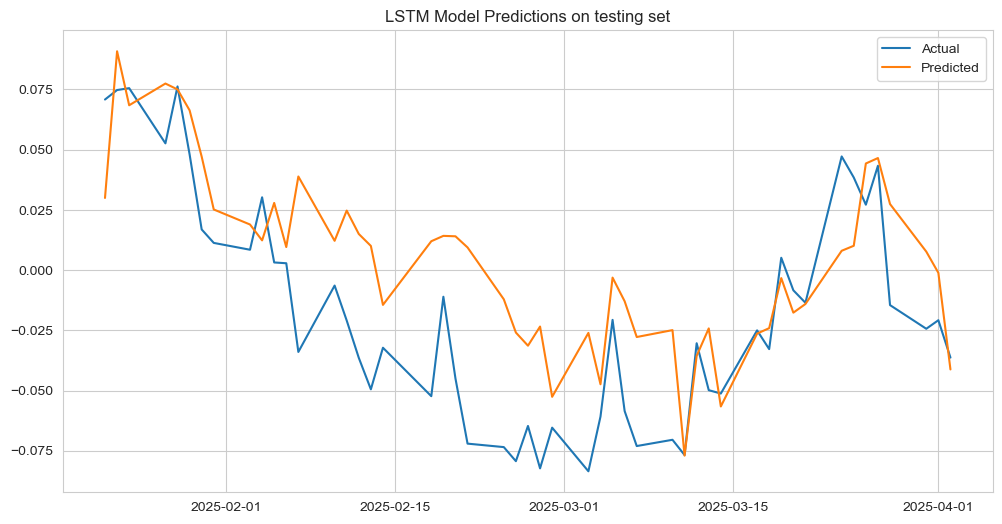

r2 score 0.6618


In [176]:
# Transforming the data back to the usual scale
res1 = scaler.inverse_transform(np.hstack([data_test[:, :-1], y_pred_test.reshape(-1, 1)]))
res2 = scaler.inverse_transform(data_test)
y_pred = res1[:, -1].reshape(-1, 1)
y_test = res2[:, -1].reshape(-1, 1)

plt.figure(figsize=(12, 6))
plt.plot(data.index[-50:], y_test[-50:], label='Actual')
plt.plot(data.index[-50:], y_pred[-50:], label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test, y_pred):.4f}")

0.9595434529275941

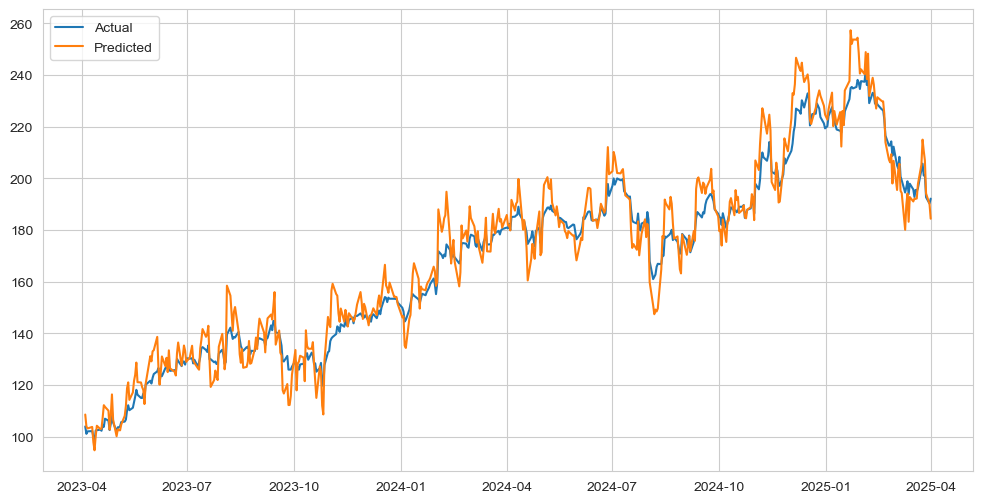

In [258]:
price_predicted = np.exp(y_pred) * (data.Close.shift(-7)[-508:-8].to_numpy().reshape(-1, 1))
actual_price = data.Close[-501:-1]
plt.figure(figsize=(12, 6))
plt.plot(data.index[-501:-1], actual_price, label='Actual')
plt.plot(data.index[-501:-1], price_predicted, label='Predicted')
plt.legend()
r2_score(actual_price, price_predicted)

## Predicting the next Amazon day price

In [237]:
def create_last_sequences(data, seq_length):
    sequences = []
    sequences.append(data[-seq_length:])
    # the following code assumes that the target is the last column
    return np.array(sequences)

data_test = scaler.transform(data)
input = create_last_sequences(data_test, SEQ_LENGTH)

input_tensor = torch.tensor(input, dtype=torch.float32).to(device)
input_tensor = input_tensor.view(-1, SEQ_LENGTH, 6)
model.eval()
with torch.no_grad():
    output = model(input_tensor).squeeze().cpu().numpy()

res1 = scaler.inverse_transform(np.hstack([np.zeros(5), output.reshape(-1, )]).reshape(1, 6))
print(f"The predicted next 7-day log return is {res1[:, -1][0]:.4f}")
print(f"The predicted {(data.index[-1].date() + timedelta(days=1)).strftime("%Y-%m-%d")} Amazon Close Price is {(np.exp(res1[:, -1]) * data['Close'][-7])[0]:.4f}")

The predicted next 7-day log return is -0.0220
The predicted 2025-04-03 Amazon Close Price is 201.2246


/var/folders/2h/69hg_xrd4fb4nytgmwvn8ch40000gn/T/ipykernel_2128/1082638271.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The predicted {(data.index[-1].date() + timedelta(days=1)).strftime("%Y-%m-%d")} Amazon Close Price is {(np.exp(res1[:, -1]) * data['Close'][-7])[0]:.4f}")


# 7D log return pacf for simulated price data also has this pattern

<Figure size 800x400 with 0 Axes>

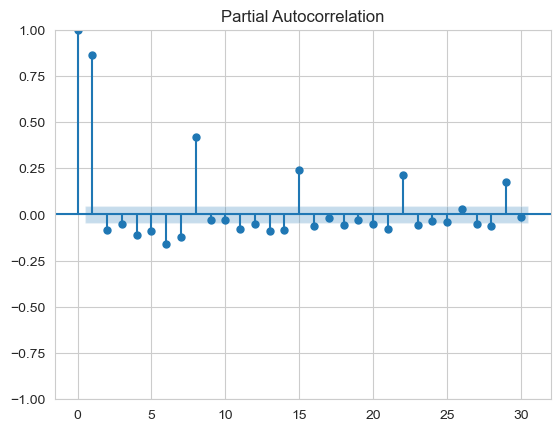

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate Geometric Brownian Motion
T = 365 * 5  # 10 years of daily data
mu = 0.005  # Small drift
sigma = 0.1  # Volatility
S0 = 100  # Initial price

dt = 1  # 1 day time step
W = np.random.randn(T) * np.sqrt(dt)  # Brownian increments
S = S0 * np.exp(np.cumsum((mu - 0.5 * sigma**2) * dt + sigma * W))  # GBM process

# Compute 7-day log returns
log_returns = np.log(S[7:] / S[:-7])

# Plot PACF
plt.figure(figsize=(8,4))
plot_pacf(log_returns, lags=30, method="ywm")
plt.show()

# weekly_returns = np.log(S[7::7] / S[:-7:7])
# plot_pacf(weekly_returns, lags=30, method="ywm")

In [159]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")


data = S.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        # the following code assumes that the target is the last column
        targets.append(data[i+seq_length][-1])
    return np.array(sequences), np.array(targets)

data_train = data[:-500]
data_test = data[-500:]

# Now, this scaler will not cause data leakage
scaler = MinMaxScaler(feature_range=(-1, 1))
data_train= scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)
data_scaled = np.vstack([data_train, data_test])

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X[:-500], dtype=torch.float32).to(device), torch.tensor(y[:-500], dtype=torch.float32).to(device)
X_test, y_test = torch.tensor(X[-500:], dtype=torch.float32).to(device), torch.tensor(y[-500:], dtype=torch.float32).to(device)

# Reshape for LSTM (batch_size, seq_length, num_features)
X_train = X_train.view(-1, SEQ_LENGTH, 1)
X_test = X_test.view(-1, SEQ_LENGTH, 1)

# Create DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)


Using mps device


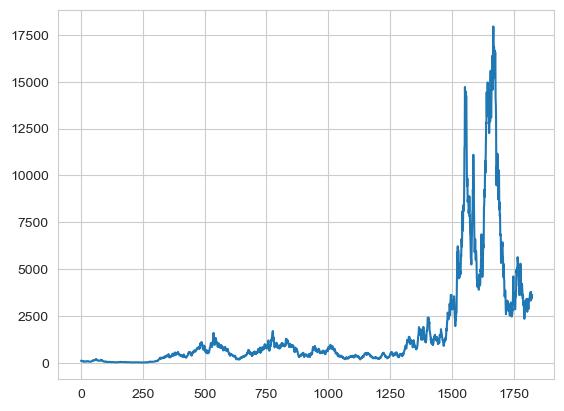

In [160]:
data
plt.plot(data)

In [162]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2, output_dim=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Take last output from LSTM
        return out

# Initialize Model
model = LSTMModel().to(device)

In [163]:
# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
EPOCHS = 1000
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss/len(train_loader):.6f}')

Epoch [10/1000], Loss: 0.008051
Epoch [20/1000], Loss: 0.005013
Epoch [30/1000], Loss: 0.004385
Epoch [40/1000], Loss: 0.004130
Epoch [50/1000], Loss: 0.004307
Epoch [60/1000], Loss: 0.004065
Epoch [70/1000], Loss: 0.004000
Epoch [80/1000], Loss: 0.004205
Epoch [90/1000], Loss: 0.004064
Epoch [100/1000], Loss: 0.003956
Epoch [110/1000], Loss: 0.003995
Epoch [120/1000], Loss: 0.003943
Epoch [130/1000], Loss: 0.003967
Epoch [140/1000], Loss: 0.003825
Epoch [150/1000], Loss: 0.003845
Epoch [160/1000], Loss: 0.003748
Epoch [170/1000], Loss: 0.003634
Epoch [180/1000], Loss: 0.003664
Epoch [190/1000], Loss: 0.003510
Epoch [200/1000], Loss: 0.003465
Epoch [210/1000], Loss: 0.003495
Epoch [220/1000], Loss: 0.003357
Epoch [230/1000], Loss: 0.003367
Epoch [240/1000], Loss: 0.003117
Epoch [250/1000], Loss: 0.002837
Epoch [260/1000], Loss: 0.002685
Epoch [270/1000], Loss: 0.002588
Epoch [280/1000], Loss: 0.002542
Epoch [290/1000], Loss: 0.002525
Epoch [300/1000], Loss: 0.002288
Epoch [310/1000], L

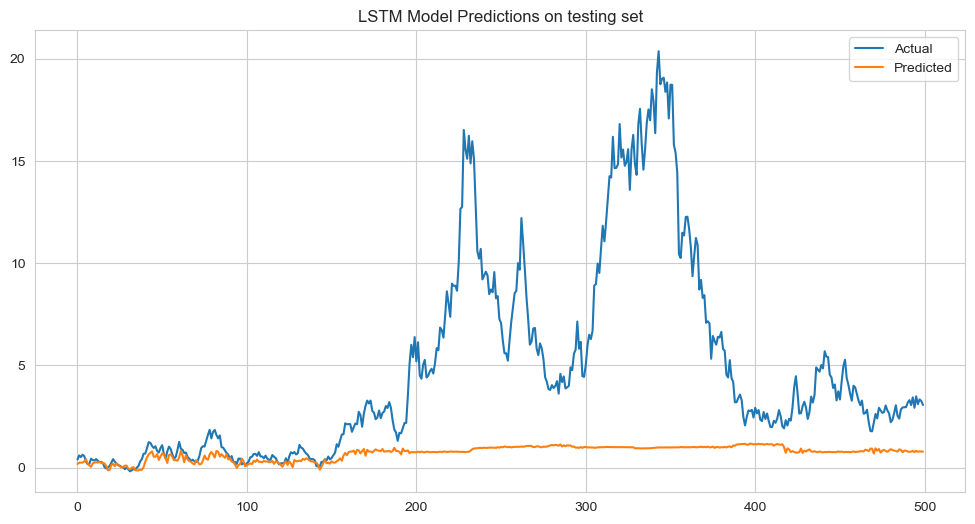

r2 score -0.6092


In [164]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test).squeeze().cpu().numpy()

# Inverse transform predictions
# y_pred_test_rescaled = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
# y_test_rescaled = scaler.inverse_transform(y_test.numpy().reshape(-1, 1))

y_pred_test_rescaled = y_pred_test.reshape(-1, 1)
y_test_rescaled = y_test.cpu().numpy().reshape(-1, 1)

# Plot results

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_test_rescaled, label='Predicted')
plt.legend()
plt.title("LSTM Model Predictions on testing set")
plt.show()

print(f"r2 score {r2_score(y_test_rescaled, y_pred_test_rescaled):.4f}")

# SRW, HRW comparison

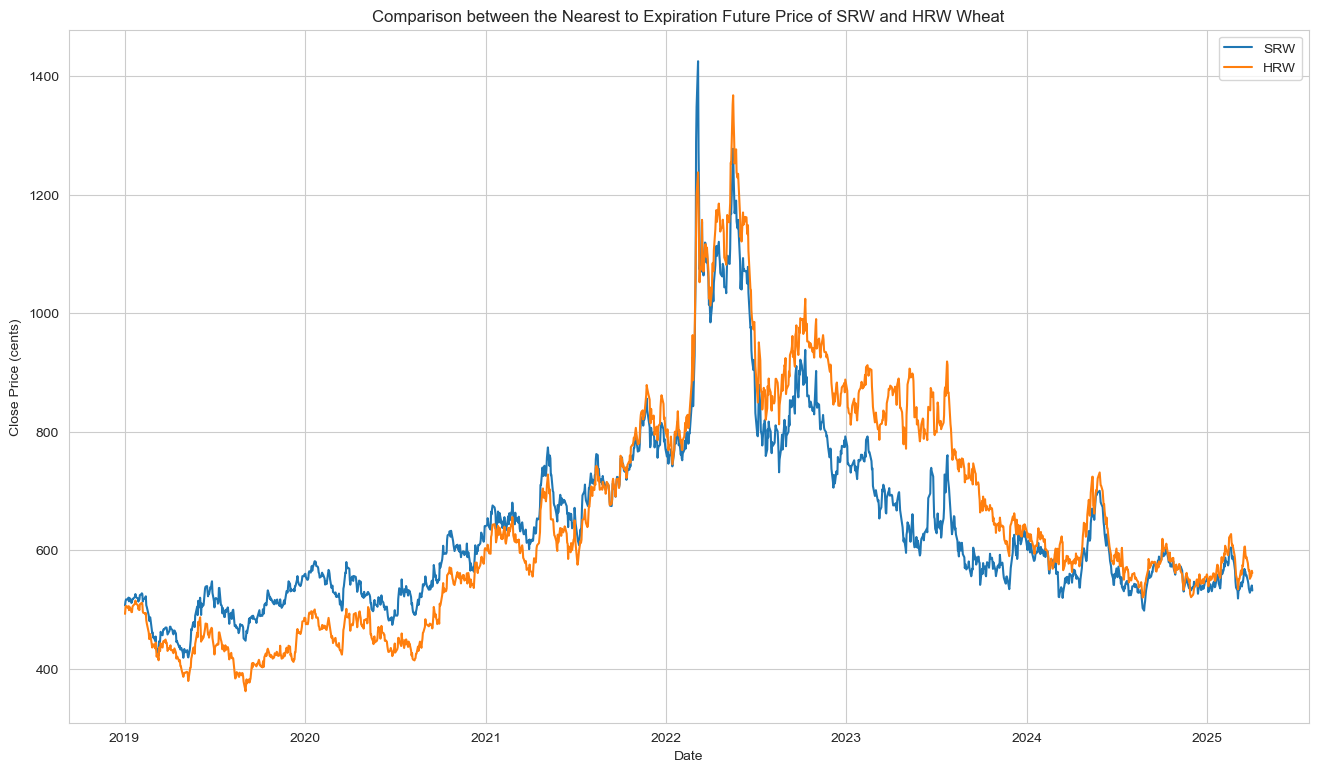

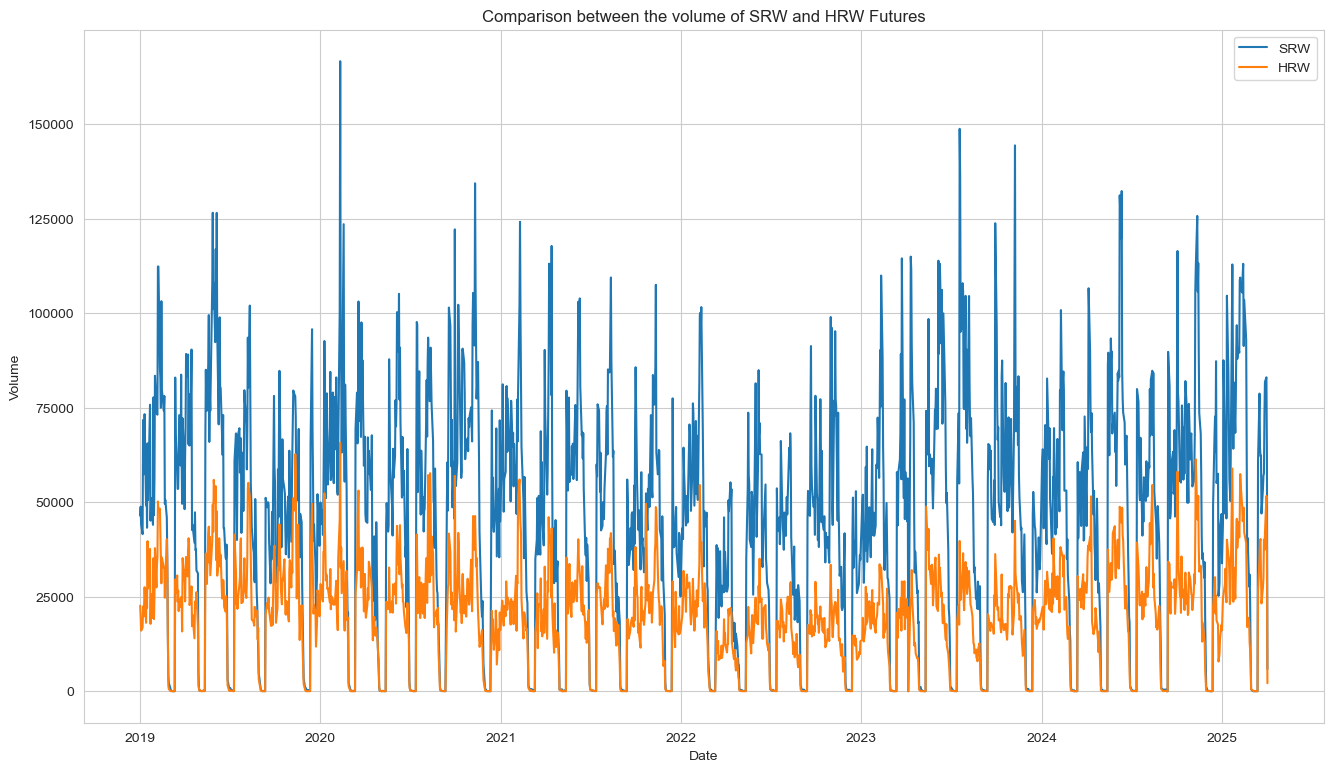

In [39]:
fig, ax1 = plt.subplots(figsize=(16,9))
plt.title("Comparison between the Nearest to Expiration Future Price of SRW and HRW Wheat")

sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW", ax=ax1)
sns.lineplot(x = 'Date', y = 'Close', data = HRW_data, label = "HRW", ax=ax1)
ax1.set_ylabel('Close Price (cents)')
plt.savefig('../imgs/wheat/price.png')
plt.show()

plt.figure(figsize=(16, 9))
plt.title("Comparison between the volume of SRW and HRW Futures")
sns.lineplot(SRW_data['Volume'], label = "SRW")
sns.lineplot(HRW_data['Volume'], label = "HRW")
plt.show()

The SRW volume dominates the HRW volume. Their price is moving in a similar pattern.

### Volatility analysis

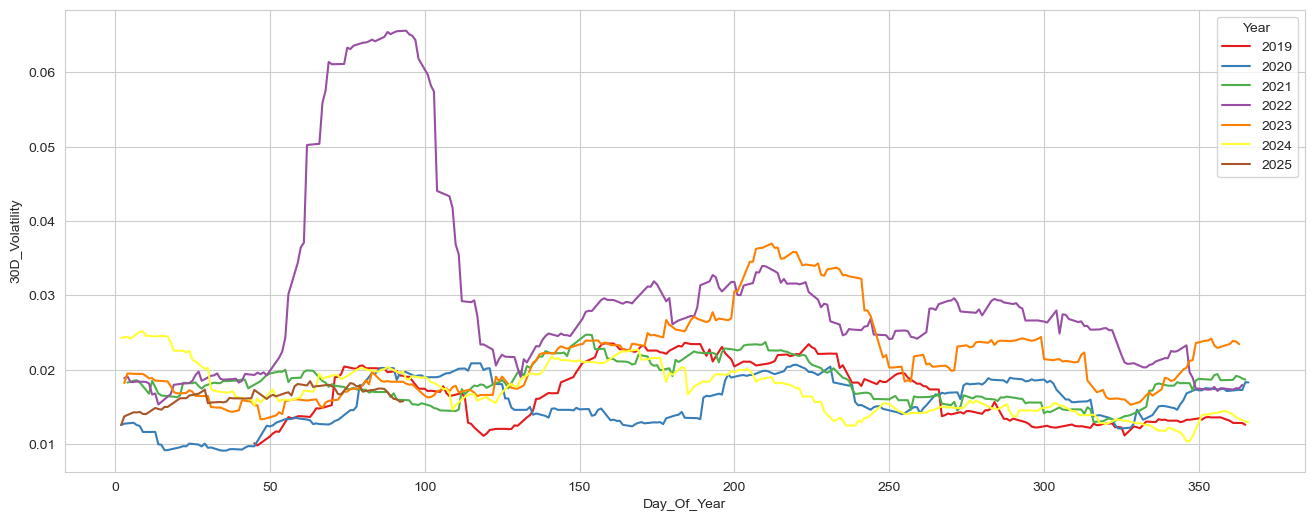

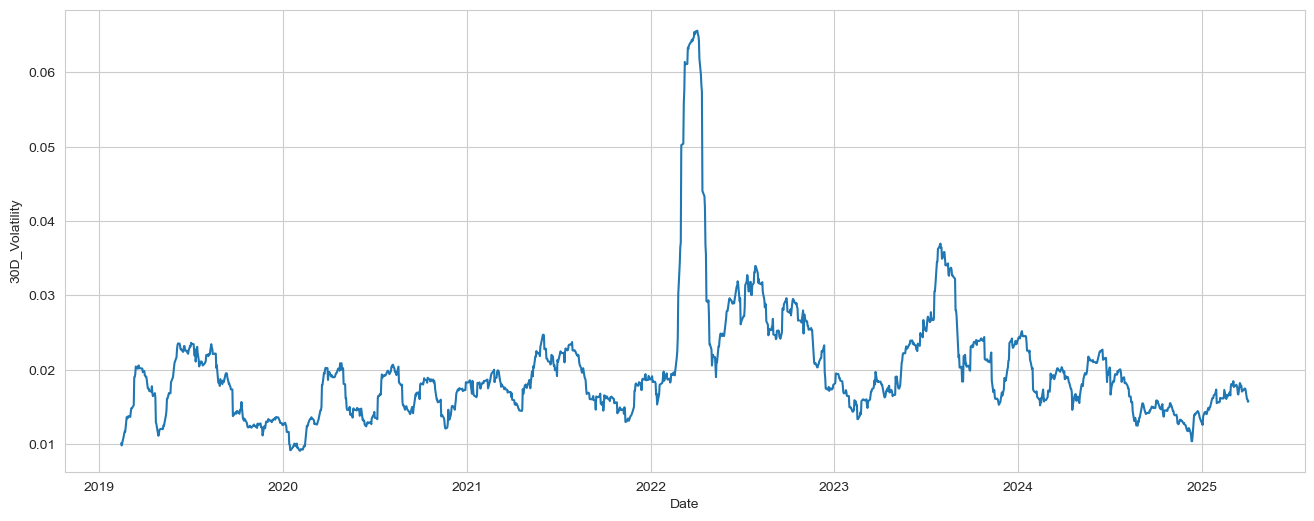

<Axes: xlabel='DTE', ylabel='30D_Volatility'>

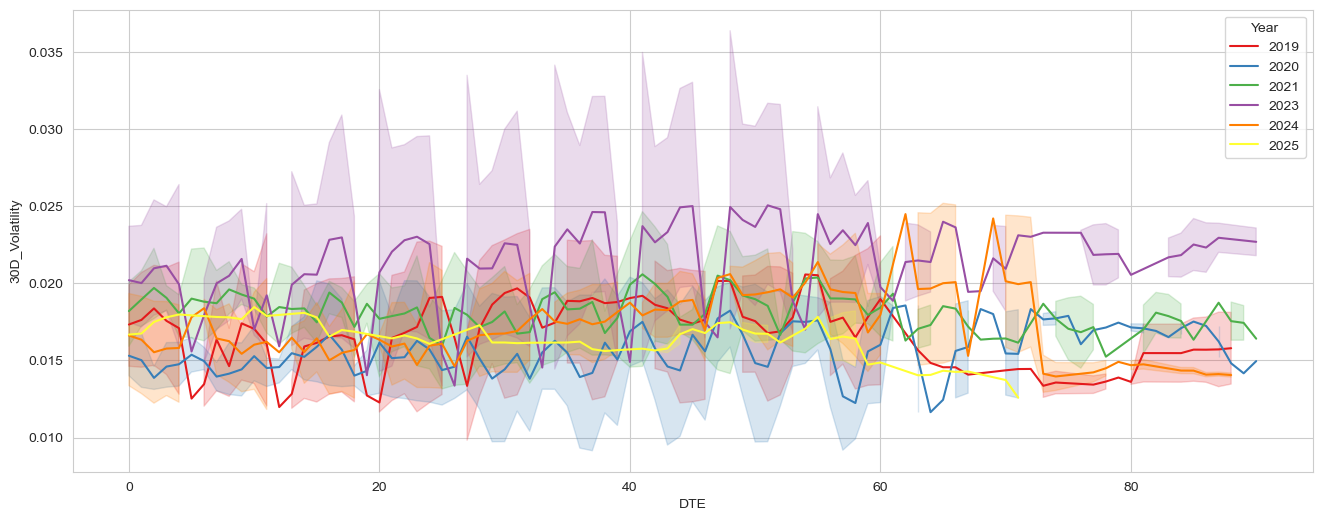

In [58]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'Day_Of_Year', y = '30D_Volatility', data = SRW_data, hue = 'Year', palette='Set1')
plt.show()

plt.figure(figsize=(16, 6))
sns.lineplot(x = 'Date', y = '30D_Volatility', data = SRW_data)
plt.show()

SRW_data_without_2022 = SRW_data[SRW_data['Year'] != 2022]
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'DTE', y = '30D_Volatility', data = SRW_data_without_2022, hue = 'Year', palette='Set1')

### Other wheat indexes

In [ ]:
# This index data is almost a scaled version of the wheat price
ticker = 'WEAT'
data = yf.Ticker(ticker).history(start ="2014-01-01", end ="2024-12-31")

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'Close', data = data, label = "index")
# sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")

### Comparing futures with different expiry month

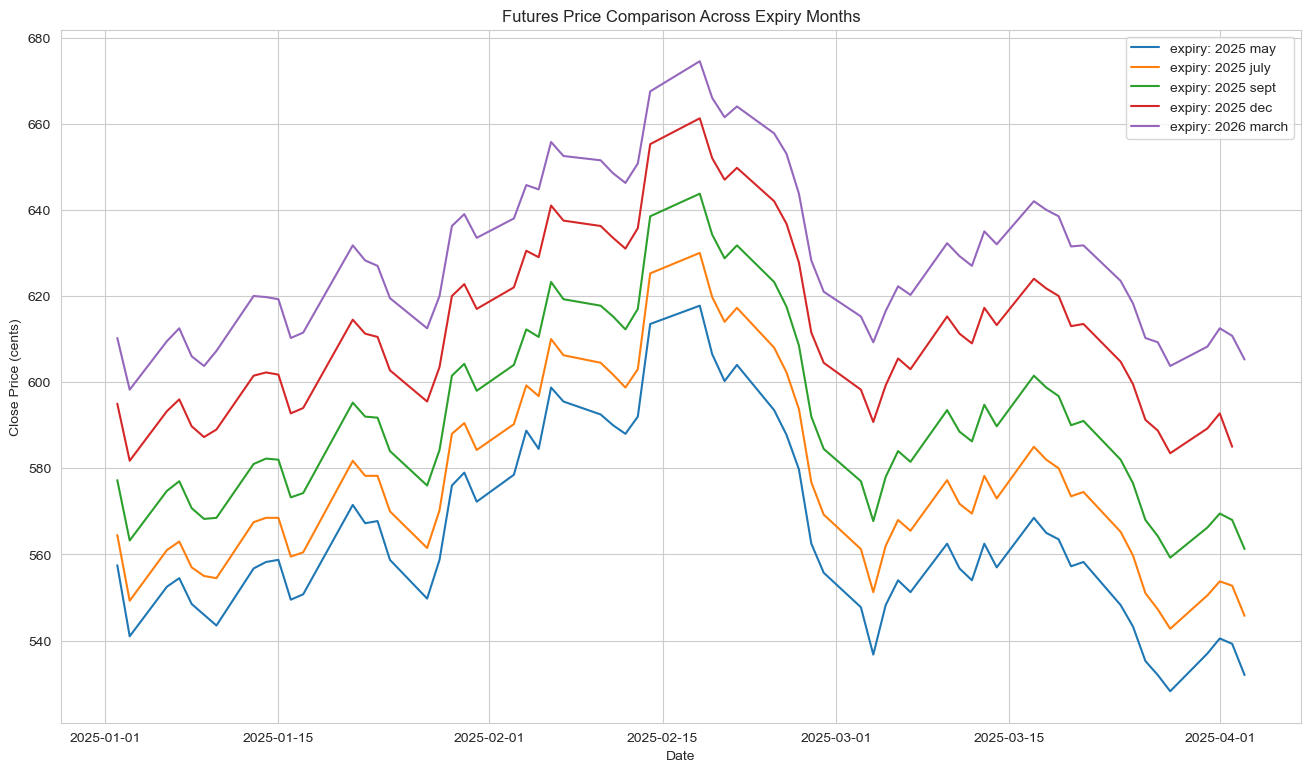

In [46]:
march = yf.Ticker("ZWH26.CBT").history(start ="2025-01-01")
may = yf.Ticker("ZWK25.CBT").history(start ="2025-01-01")
july = yf.Ticker("ZWN25.CBT").history(start ="2025-01-01")
sept = yf.Ticker("ZWU25.CBT").history(start ="2025-01-01")
dec = yf.Ticker("ZWZ25.CBT").history(start ="2025-01-01")


plt.figure(figsize = (16,9))
plt.title("Futures Price Comparison Across Expiry Months")
sns.lineplot(x = 'Date', y = 'Close', data = may, label = "expiry: 2025 may")
sns.lineplot(x = 'Date', y = 'Close', data = july, label = "expiry: 2025 july")
sns.lineplot(x = 'Date', y = 'Close', data = sept, label = "expiry: 2025 sept")
sns.lineplot(x = 'Date', y = 'Close', data = dec, label = "expiry: 2025 dec")
sns.lineplot(x = 'Date', y = 'Close', data = march, label = "expiry: 2026 march")
plt.ylabel('Close Price (cents)')
# plt.savefig('../imgs/wheat/price_expiry_month_comparison.png')
plt.show()

### Contango Market Structure
- **Contango** is a market condition where futures contracts with later expiration dates trade at higher prices than near-term contracts.

**Why Does Contango Happen? (Cost-of-Carry Model)**:
1. Storage Costs
    - If wheat is stored in a CME-approved warehouse, the holder incurs storage fees.
    - Since May wheat futures require holding wheat longer than March, storage costs increase over time, contributing to a higher May price.
2. Financing Costs (Interest Rates)
3. Insurance & Transportation Costs
    - If wheat is stored for longer periods, it requires insurance against spoilage, theft, or contamination.
4. Market Expectations
    - If traders expect wheat prices to rise in the future, they may bid up prices for later contracts.